In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pwd

'/Users/yvesgreatti/github/kaggle_favorita_grocery_sales_forecasting/notebook'

In [3]:
dtype_dict={"id":np.uint32,
            "store_nbr":np.uint8,
            "item_nbr":np.uint32,
            "unit_sales":np.float32
           }
df = pd.read_csv("../output/data/train_top_10_store_10_item.csv", dtype=dtype_dict)

/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_85721/2375169706.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../output/data/train_top_10_store_10_item.csv", dtype=dtype_dict)


In [4]:
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion,store_item
0,2013-01-07,48,502331,70.000000,NaN,48_502331
1,2013-01-07,48,567623,25.000000,NaN,48_567623
2,2013-01-07,48,581078,16.000000,NaN,48_581078
3,2013-01-07,48,582864,63.675999,NaN,48_582864
4,2013-01-07,49,314384,34.000000,NaN,49_314384


In [5]:
df["date"] = pd.to_datetime(df["date"])


In [6]:
df.sort_values(["date"], inplace=True)

In [7]:
df["date"].unique()

<DatetimeArray>
['2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00', '2013-01-11 00:00:00', '2013-01-12 00:00:00',
 '2013-01-13 00:00:00', '2013-01-14 00:00:00', '2013-01-15 00:00:00',
 '2013-01-16 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1674, dtype: datetime64[ns]

In [8]:
oil = pd.read_csv("../data/oil.csv", parse_dates=['date'])


In [9]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [10]:
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate()
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')
oil.isnull().sum()


/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_85721/677364325.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')


date          0
dcoilwtico    0
dtype: int64

In [11]:
sales_oil = df.groupby("date")["unit_sales"].sum().reset_index()  # Aggregate daily sales
sales_oil = sales_oil.merge(oil, on="date", how="left") 
sales_oil.head(5)

,date,unit_sales,dcoilwtico
0,2013-01-07,8824.406250,93.20
1,2013-01-08,7074.680176,93.21
2,2013-01-09,7137.820801,93.08
3,2013-01-10,6278.104004,93.81
4,2013-01-11,7776.372070,93.60


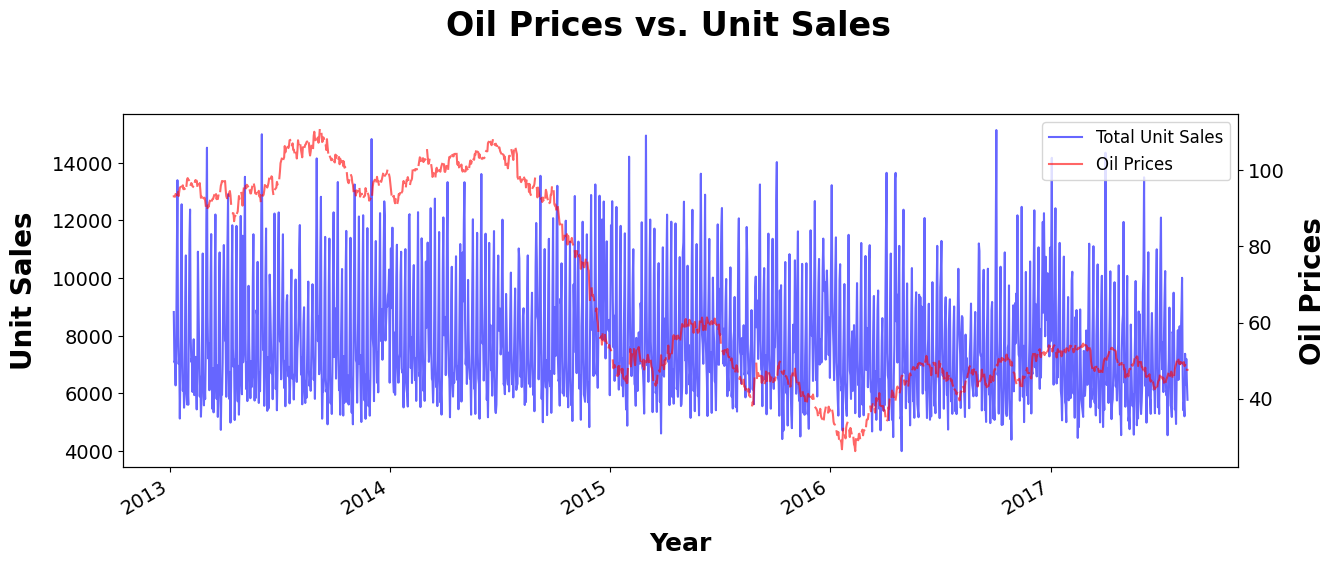

In [12]:

# Create figure + primary axis
fig, ax = plt.subplots(figsize=(14, 6))

# Adjust margins
fig.subplots_adjust(bottom=0.15, left=0.2, hspace=0.5, wspace=0.5)

# Plot on primary y-axis
ax.plot(
    sales_oil["date"],
    sales_oil["unit_sales"],
    label="Total Unit Sales",
    color="blue",
    alpha=0.6
)
ax.set_ylabel(
    "Unit Sales",
    labelpad=10,
    fontsize=20,
    fontweight="bold"
)

# Create secondary y-axis
ax2 = ax.twinx()
ax2.plot(
    sales_oil["date"],
    sales_oil["dcoilwtico"],
    label="Oil Prices",
    color="red",
    alpha=0.6
)
ax2.set_ylabel(
    "Oil Prices",
    labelpad=10,
    fontsize=20,
    fontweight="bold"
)

# Common x-axis label and title
ax.set_xlabel(
    "Year",
    labelpad=10,
    fontsize=18,
    fontweight="bold"
)
fig.suptitle(
    "Oil Prices vs. Unit Sales",
    fontsize=24,
    fontweight="bold"
)

# Increase tick label size on both axes
ax.tick_params(axis="both", which="major", labelsize=14)
ax2.tick_params(axis="y", which="major", labelsize=14)

# If you want rotated x‑ticks for readability:
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# Add legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=12, loc="best")

fig.tight_layout(pad=3.0)

plt.savefig("../output/figures/oil_sale.tiff", dpi=300, bbox_inches="tight")
plt.show()
plt.close()         # closes the current figure



In [13]:
len(df)

167304

In [14]:
# Extract store-item pairs from the 'id' column
df["store_item"] = df["store_nbr"].astype(str).str.cat(df["item_nbr"].astype(str), sep="_")
print("Unique (store, item) pairs:", df["store_item"].nunique())


Unique (store, item) pairs: 100


In [15]:
df["date"] = pd.to_datetime(df["date"])
df["unit_sales"] = df["unit_sales"].fillna(0)
df['unit_sales'] = df['unit_sales'].clip(lower=0)

In [16]:
df["date"].unique()

<DatetimeArray>
['2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00', '2013-01-11 00:00:00', '2013-01-12 00:00:00',
 '2013-01-13 00:00:00', '2013-01-14 00:00:00', '2013-01-15 00:00:00',
 '2013-01-16 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1674, dtype: datetime64[ns]

In [17]:

# assume df["date"] is datetime64[ns]
min_date = df["date"].min()

# compute the Monday of the week containing min_date
week_start = min_date - pd.Timedelta(days=min_date.weekday())
week_start
#if min_date is already a Monday, keep that; otherwise bump to next week’s Monday
if min_date.weekday() == 0:
    first_monday = week_start
else:
    first_monday = week_start + pd.Timedelta(days=7)

print("min_date:", min_date)
print("first day of the first full week:", first_monday)
df = df[df['date'] >= first_monday]


min_date: 2013-01-07 00:00:00
first day of the first full week: 2013-01-07 00:00:00


In [ ]:
 # Save to a new CSV
df.to_csv(
    "../output/data/train_top_10_store_10_item.csv",
    index=False
)

# Preprocessing Test Data

In [22]:
dtype_dict={"id":np.uint32,
            "store_nbr":np.uint8,
            "item_nbr":np.uint32,
            "onpromotion":np.float32
           }
test_df = pd.read_csv("../data/test.csv", dtype=dtype_dict)

In [23]:
test_df.drop("id", axis=1, inplace=True)
test_df["date"] = pd.to_datetime(test_df["date"])
test_df["unit_sales"] = 0
test_df["store_item"] = test_df["store_nbr"].astype(str).str.cat(test_df["item_nbr"].astype(str), sep="_")
len(test_df)

3370464

In [24]:
cols = ['date', 'store_item', 'store_nbr', 'item_nbr'] + [c for c in test_df.columns 
                                  if c not in ('date', 'store_item', 'store_nbr', 'item_nbr')]
test_df = test_df[cols]
test_df = test_df.sort_values(by=['date', 'store_item'])
test_df = test_df.reset_index(drop=True)
test_df.head(5)

,date,store_item,store_nbr,item_nbr,onpromotion,unit_sales
0,2017-08-16,10_1000866,10,1000866,0.0,0
1,2017-08-16,10_1001305,10,1001305,0.0,0
2,2017-08-16,10_1003679,10,1003679,0.0,0
3,2017-08-16,10_1004545,10,1004545,0.0,0
4,2017-08-16,10_1004550,10,1004550,1.0,0


In [21]:
test_df.head(5)

,id,date,store_nbr,item_nbr,onpromotion,unit_sales,store_item
0,125497040,2017-08-16,1,96995,0.0,0,1_96995
1,125497041,2017-08-16,1,99197,0.0,0,1_99197
2,125497042,2017-08-16,1,103501,0.0,0,1_103501
3,125497043,2017-08-16,1,103520,0.0,0,1_103520
4,125497044,2017-08-16,1,103665,0.0,0,1_103665


In [25]:
df.head(5)

,date,store_nbr,item_nbr,unit_sales,onpromotion,store_item
0,2013-01-07,48,502331,70.00000,NaN,48_502331
72,2013-01-07,46,584028,304.27301,NaN,46_584028
71,2013-01-07,3,114790,28.00000,NaN,3_114790
70,2013-01-07,3,305229,89.00000,NaN,3_305229
69,2013-01-07,3,314384,106.00000,NaN,3_314384


In [27]:
valid_stores = df["store_nbr"].unique().tolist()
valid_stores

[48, 46, 3, 8, 44, 45, 50, 49, 47, 51]

In [28]:
valid_items = df["item_nbr"].unique().tolist()
valid_items

[502331,
 584028,
 114790,
 305229,
 314384,
 364606,
 567623,
 581078,
 582864,
 1047679]

In [29]:
test_df_filtered = test_df[test_df["store_nbr"].isin(valid_stores) ]
test_df_filtered = test_df_filtered[ test_df_filtered["item_nbr"].isin(valid_items) ]
len(test_df_filtered)

1600

In [30]:
print("Unique (store, item) pairs:", test_df_filtered["store_item"].nunique())

Unique (store, item) pairs: 100


In [35]:
test_df_filtered.head(5)

,date,store_item,store_nbr,item_nbr,onpromotion,unit_sales
124905,2017-08-16,3_1047679,3,1047679,0.0,0
125164,2017-08-16,3_114790,3,114790,1.0,0
127671,2017-08-16,3_305229,3,305229,0.0,0
127695,2017-08-16,3_314384,3,314384,1.0,0
127783,2017-08-16,3_364606,3,364606,0.0,0


In [33]:
test_df_filtered.to_excel(
    "../output/data/test_top_10_store_10_store_item.xlsx",
    index=False
)

In [36]:
item_df = pd.read_csv("../data/items.csv")
item_df.head(5)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [40]:
w_perish = (
    item_df
      .query("perishable == 1")[["item_nbr"]]
      .assign(weight=1.25)
)

# build the “non‑perishable” weights:
w_non    = (
    item_df
      .query("perishable == 0")[["item_nbr"]]
      .assign(weight=1.00)
)

# concatenate and reset index:
weights_df = pd.concat([w_perish, w_non], ignore_index=True)

# if you want to preserve original order:
weights_df = (
    item_df[['item_nbr']]
      .merge(weights_df, on='item_nbr')
)
weights_df.rename(columns={"item_nbr": "item"}, inplace=True)

weights_df.head()

,item,weight
0,96995,1.00
1,99197,1.00
2,103501,1.00
3,103520,1.00
4,103665,1.25


In [43]:
weights_df = weights_df[ weights_df["item"].isin(valid_items) ]


In [45]:
weights_df.to_excel(
    "../output/data/top_10_item_weights.xlsx",
    index=False
)